<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Problemas_de_Strum_liouville_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problemas de Strum-Liouville son Sympy

Se resuleven dos problemas clásicos de Strum-Lioville utilizando la librería de "Sympy", para ello trataremos de automatizar lo más que se pueda cicho proceso y posteriormente graficaremos algunas soluciones.

El objetivo es realizar simbólicamente y graficar los siguientes problemas

1. $X'' +kX = 0$ con $X(0)=X(1)=0$
2. $X'' +kX = 0$ con $X'(0)=X'(1)=0$

Ambos son problemas de valores propios que aparecen al resolver las ecuaciones diferenciales.

In [ ]:
import sympy as sp   #para simbologia
import numpy as np   #para calculos numericos
import matplotlib.pyplot as ptl #para graficar
from scipy.integrate import solve_bvp #para resolver ecuaciones diferenciales parciales

sp.init_printing()

## Problema 1. Strum-liouville con condiciones de frontera Dirchlet.

Buscamos los valores de $k$ para los cuales la ecuación diferencial $X'' +kX = 0$ tiene soluciones no triviales que satisfacen las condiciones de frontera  $X(0)=X(1)=0$

Su solución se basa en encontrar los eigenvalores $k_n$  y las eigenfunciones $X_n(x)$ correspondientes.

Usaremos SymPy para obtener la solución general con `dsolve`

 Parte simbólica: resolver con `dsolve`

In [ ]:
#Definir las variables simbolicas
x,k= sp.symbols("x k", real=True)
X=sp.Function("X")

#Definimos la ecuacion diferencial
edo1=sp.Eq(sp.Derivative(X(x),x,2) + k*X(x), 0)

#Solucion general con dsolve
sol1=sp.dsolve(edo1, X(x))
sol1

                ____           ____
           -x⋅╲╱ -k        x⋅╲╱ -k 
X(x) = C₁⋅ℯ          + C₂⋅ℯ        

Dado que las raices son complejas es posible escribir la solución en terminos de senos y cosenos.
Esta expresión nos permite aplicar las condiciones.

In [ ]:
#Reescribimos la solucion como combinacion de senos y cosenos para poder aplicar las condiciones facilmente

C1, C2=sp.symbols("C1 C2")
X_expr=C1*sp.sin(sp.sqrt(k)*x) + C2*sp.cos(sp.sqrt(k)*x)
X_expr


C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)

## Analisis simbólico de condiciones de frontera
Aplicamos las condiciones de frontera

- $X(0)=0 \Rightarrow C_2 =0$
- $X(1)=0 \Rightarrow \sin(\sqrt{k}) =0$

Por lo tanto:
$\sqrt{k}=n\pi \Rightarrow k=(n\pi)^2
$
Los eigenvalores son:
$k_n =(n\pi)^2, \quad n=1, 2 ,3 \dots $

Las eigenfunciones son:
$X_n= \sin(n\pi x)$

Y las funciones propias correspondientes son:
$X_n(x) = \sin(n\pi x)$

In [ ]:
# Aplicamos condiciones de frontera
cond_0 = X_expr.subs(x, 0)      # Esto nos da C2 = 0
cond_1 = X_expr.subs({x: 1, C2: 0})  # Queda C1*sin(sqrt(k)) = 0

# Simplificamos ecuación para obtener valores propios
eq_k = sp.Eq(sp.sin(sp.sqrt(k)), 0)
eq_k

sin(√k) = 0

Eigenvalores y eigenfunciones.Es decir encontramos los valores propios (valores de k)

In [ ]:
#Obtenemos la expresion de los  valores propios
n=sp.symbols("n",integer=True, positive=True)
k_n=(n*sp.pi)**2
Xn= sp.sin(n*sp.pi*x)
display(sp.Eq(sp.Symbol('k_n'), k_n))
display(sp.Eq(sp.Function('X_n')(x), Xn))


      2  2
kₙ = π ⋅n 

Xₙ(x) = sin(π⋅n⋅x)

Graficar algunas eigenfunciones

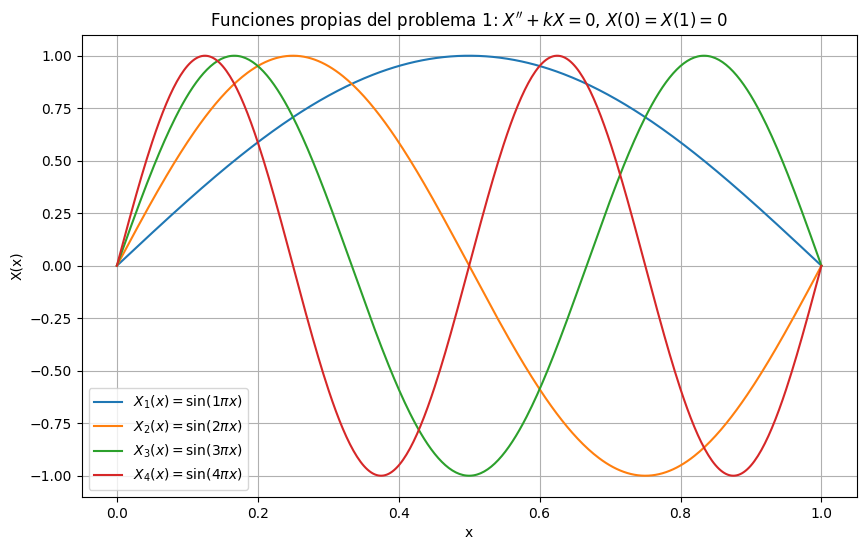

In [ ]:
import matplotlib.pyplot as plt
#graficamos Xn(x)=sin(nπx) para n= 1, 2, 3, 4
x_vals=np.linspace(0, 1, 400)

plt.figure(figsize=(10,6))
for n_val in range(1,5):
    y_vals=np.sin(n_val*np.pi*x_vals)
    plt.plot(x_vals, y_vals, label=f"$X_{n_val}(x) = \\sin({n_val}\\pi x)$")


plt.title("Funciones propias del problema 1: $X'' +kX =0$, $X(0)=X(1)=0$")
plt.xlabel("x")
plt.ylabel("X(x)")
plt.grid(True)
plt.legend()
plt.show()


## Problema 2. Strum-liouville con condiciones de frontera Neumann

Buscamos los valores de $k$ para los cuales la ecuación diferencial $X'' +kX = 0$ tiene soluciones no triviales que satisfacen las condiciones de frontera  $X'(0)=X'(1)=0$

Su solución se basa en encontrar los eigenvalores $k_n$  y las eigenfunciones $X_n(x)$ correspondientes.



El objetivo es:
1. Obtener la solución general para ello utilizare `dsolve`
2. Imponer simbólicamente las condiciones de frontera.
3. Obtener los eigenvalores y eigenfunciones
4. Representar gráficamente algunas soluciones

In [ ]:


#Definir las variables simbolicas
x,k= sp.symbols("x k", real=True)
X=sp.Function("X")

#Definimos la ecuacion diferencial
edo2=sp.Eq(sp.Derivative(X(x),x,2) + k*X(x), 0)

#Solucion general con dsolve
sol2=sp.dsolve(edo1, X(x))
sol2




                ____           ____
           -x⋅╲╱ -k        x⋅╲╱ -k 
X(x) = C₁⋅ℯ          + C₂⋅ℯ        

Lasolucion general de la ecuacion se puede escribir en forma trigonométrica

$X(x)= C_1 \sin(\sqrt {k} x) + C_2 \cos(\sqrt {k} x) $

Esto facilitará al aplicar las condiciones de frontera.

In [ ]:
#Reescribimos la solucion como combinacion de senos y cosenos para poder aplicar las condiciones facilmente

C1, C2=sp.symbols("C1 C2")
X_expr2=C1*sp.sin(sp.sqrt(k)*x) + C2*sp.cos(sp.sqrt(k)*x)
X_expr2


C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)

Vamos a analizar que ocurre cuando Aplicamos las **condiciones de frontera tipo Neumann**:

De la solución general

$X(x)= C_1 \sin(\sqrt {k} x) + C_2 \cos(\sqrt {k} x) $

$X'(x)= C_1 \sqrt{k} \cdot \cos(\sqrt {k} x) - C_2 \sqrt{k} \cdot \sin(\sqrt {k} x) $


1. Condición: $X'(0)=0$


$X'(0)= C_1 \sqrt{k} \cdot \cos(0) - C_2 \sqrt{k} \cdot \sin(0) = C_1 \sqrt{k}$ $


$
\Rightarrow \boxed{C_1 = 0}
$



2.   Condición: $X'(1) = 0 $

$
X'(1) = -C_2 \sqrt{k} \cdot \sin(\sqrt{k}) = 0 \Rightarrow \boxed{\sin(\sqrt{k}) = 0}
$


Por lo tanto la ecuación para obtener los **valores propios** es:

$
\sin(\sqrt{k}) = 0 \Rightarrow \sqrt{k_n} = n\pi \Rightarrow \boxed{k_n = (n\pi)^2}, \quad n = 0, 1, 2, \dots
$


**NOTA**

El caso $n = 0$ **sí es válido** para condiciones Neumann, y da la función propia constante:

$
X_0(x) = \cos(0) = 1
$

In [ ]:
#Derivada de la solución
X_expr2_prime=sp.diff(X_expr2, x)

#Aplicamos condiciones de frontera
cond2_0=X_expr2_prime.subs(x,0) #Implica C1=0
cond2_1=X_expr2_prime.subs({x:1, C1:0}) # Implica sin(sqrt(k)) = 0

#Ecuacion resuoltante para hallar los k_n
eq_k2=sp.Eq(sp.sin(sp.sqrt(k)), 0)
eq_k2


sin(√k) = 0

Valores propios y funciones propias

In [ ]:
# Definimos valores propios y funciones propias
n= sp.symbols("n", integer=True, nonnegative=True)
k_n2=(n*sp.pi)**2
Xn2=sp.cos(n*sp.pi*x)
display(sp.Eq(sp.Symbol("k_n"), k_n2))
display(sp.Eq(sp.Function("X_n")(x), Xn2))


      2  2
kₙ = π ⋅n 

Xₙ(x) = cos(π⋅n⋅x)

## Gráfica de funciones propias
A continuación graficamos las primeras funciones propias $ X_n(x) = \cos(n \pi x) $ para $ n = 0, 1, 2, 3 $



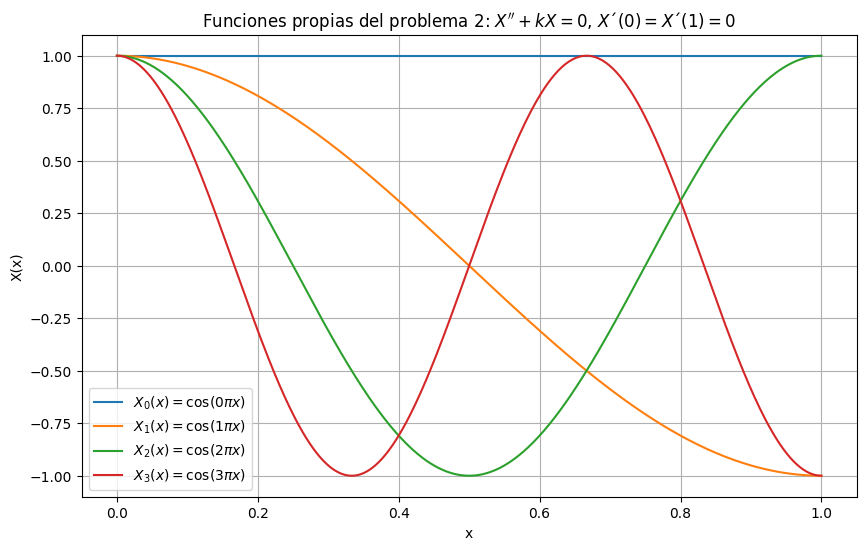

In [ ]:

#graficamos Xn(x)=cos(nπx) para n= 1, 2, 3, 4
x_vals=np.linspace(0, 1, 400)

plt.figure(figsize=(10,6))
for n_val in range(0,4):
    y_vals=np.cos(n_val*np.pi*x_vals)
    plt.plot(x_vals, y_vals, label=f"$X_{n_val}(x) = \\cos({n_val}\\pi x)$")


plt.title("Funciones propias del problema 2: $X'' +kX =0$, $X´(0)=X´(1)=0$")
plt.xlabel("x")
plt.ylabel("X(x)")
plt.grid(True)
plt.legend()
plt.show()

